In [2]:
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u

cygA_j2000 = SkyCoord(
    ra="19h59m28.3566s",
    dec="+40d44m02.096s",
    frame="icrs",
    obstime=Time("J2000")
)

now = Time.now()

cygA_now = SkyCoord(
    ra=cygA_j2000.ra,
    dec=cygA_j2000.dec,
    frame="icrs",
    obstime=now
)

cygA_now.ra, cygA_now.dec

(<Longitude 299.8681525 deg>, <Latitude 40.73391556 deg>)

Astronomical source positions are usually quoted for a fixed reference epoch, most commonly J2000.0. This does not mean that the source itself moves, but rather that the Earth’s rotation axis slowly changes direction with time due to precession. Because of this, the celestial coordinate grid changes slowly, and the numerical values of Right Ascension and Declination of a fixed source will be slightly different today compared to their J2000 values. Using Astropy, this effect can be taken into account to compute the apparent RA and Dec of Cygnus A at the present epoch.


    

In [5]:
from astropy.coordinates import EarthLocation, AltAz

iitk = EarthLocation(
    lat=26.5123*u.deg,
    lon=80.2329*u.deg,
    height=126*u.m
)

altaz_frame = AltAz(obstime=now, location=iitk)

cygA_altaz = cygA_j2000.transform_to(altaz_frame)

cygA_altaz.az, cygA_altaz.alt


(<Longitude 309.22140263 deg>, <Latitude 13.32557564 deg>)

Right Ascension and Declination describe a source’s position on the celestial sphere, but an observer on Earth sees the sky in terms of azimuth and elevation. These coordinates depend on the observer’s geographic location and the time of observation. By specifying the latitude, longitude, and altitude of IIT Kanpur and transforming the equatorial coordinates of Cygnus A into the AltAz frame, the position of the source in the local sky can be calculated for the current time.

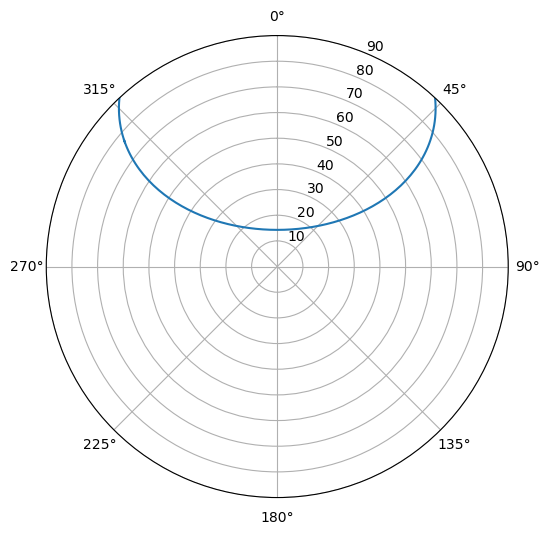

In [6]:
import numpy as np
import matplotlib.pyplot as plt

times = now + np.linspace(0, 24, 200)*u.hour

altazs = cygA_j2000.transform_to(
    AltAz(obstime=times, location=iitk)
)

az = altazs.az.radian
zenith_dist = (90*u.deg - altazs.alt).to(u.deg).value

plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(az, zenith_dist)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0, 90)
plt.show()

Due to Earth’s rotation, the apparent position of a celestial source changes continuously over the course of a day. To visualize this motion, the azimuth and elevation of Cygnus A are computed at several time intervals spanning 24 hours. These values are plotted in polar coordinates, where the angle represents the azimuth and the radial distance represents the zenith distance. This provides a clear picture of how the source moves across the sky as seen from IIT Kanpur.

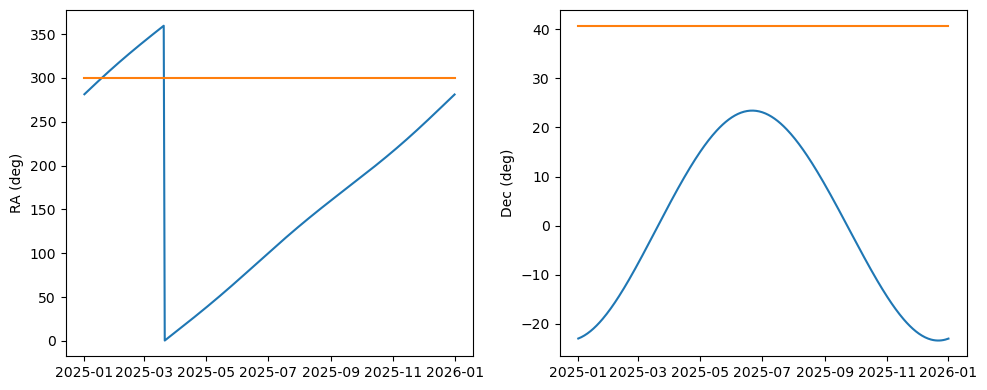

In [8]:
from astropy.coordinates import get_sun, SkyCoord
from astropy.time import Time
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

year_times = Time("2025-01-01") + np.linspace(0, 365, 365)*u.day

sun = get_sun(year_times)

cygA_year = SkyCoord(
    ra=cygA_j2000.ra,
    dec=cygA_j2000.dec,
    frame="icrs"
)

cygA_ra = np.full(len(year_times), cygA_year.ra.deg)
cygA_dec = np.full(len(year_times), cygA_year.dec.deg)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(year_times.datetime, sun.ra.deg)
plt.plot(year_times.datetime, cygA_ra)
plt.ylabel("RA (deg)")

plt.subplot(1,2,2)
plt.plot(year_times.datetime, sun.dec.deg)
plt.plot(year_times.datetime, cygA_dec)
plt.ylabel("Dec (deg)")

plt.tight_layout()
plt.show()

The Sun’s apparent position in the sky changes significantly over the course of a year because Earth revolves around it. This causes the Sun’s Right Ascension and Declination to vary smoothly with time. In contrast, Cygnus A is an extragalactic radio source at a very large distance, so its RA and Dec remain nearly constant over the same period, apart from very small changes due to precession. Plotting the RA and Dec of both objects over one year clearly highlights the difference between a nearby solar system object and a distant astrophysical source.